In [6]:
 %matplotlib inline
# imports
import basic_data_reader as bdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import fispact_printlib_reader as fpr
import fispact_analysis as fa
import fispact_output_reader
import gs_analysis as gsa


In [7]:
# data paths
# aluminium foils - measured downstairs
al21_path = "exp_data/Germanium/day3/Irradiations/Downstairs/meas_al21_vertical.spe"
al22_path = "exp_data/Germanium/day3/Irradiations/Downstairs/meas_al22_vertical.spe"

#Ta foils - measured upstairs
ta21_path = "exp_data/Germanium/day3/Irradiations/Upstairs/meas_Ta21_135mm_source_to_detector.spe"
ta22_path = "exp_data/Germanium/day3/Irradiations/Upstairs/meas_Ta22_125mm_source_to_detector.spe"
ta23_path = "exp_data/Germanium/day3/Irradiations/Upstairs/meas_Ta23_125mm_source_to_detector.spe"

# downstairs calibration runs
na22_cal_ds_path = "exp_data/Germanium/day3/Irradiations/Downstairs/ecal_22na_vertical.spe"
co60_cal_ds_path = "exp_data/Germanium/day3/Irradiations/Downstairs/ecal_60co_vertical.spe"
ag108_cal_ds_path = "exp_data/Germanium/day3/Irradiations/Downstairs/ecal_108m_ag_vertical.spe"
cs137_cal_ds_path = "exp_data/Germanium/day3/Irradiations/Downstairs/ecal_137cs_vertical.spe"
ba133_cal_ds_path = "exp_data/Germanium/day3/Irradiations/Downstairs/ecal_133ba_vertical.spe"
am241_cal_ds_path = "exp_data/Germanium/day3/Irradiations/Downstairs/ecal_241am_vertical.spe"
eu152_cal_ds_path = "exp_data/Germanium/day3/Irradiations/Downstairs/ecal_152eu_vertical.spe"

# upstairs calibration runs
co60_cal_up_path = "exp_data/Germanium/day3/Irradiations/Upstairs/ecal_60co_upstairs_141mm_source_to_detector.spe"
eu152_cal_up_path = "exp_data/Germanium/day3/Irradiations/Upstairs/ecal_152eu_upstairs_141mm_source_to_detector.spe"


In [8]:
# calibration source data
"""23/01/23
--------

Source   ID                      Activity (Bq)

108mAg   UOB940115               7820 +/-   481

241Am    1Q598                 408526 +/- 20427

133Ba    Ba133.278.17           57070 +/-  2964

60Co     Co60.284.17            41542 +/-  1828

137Cs    A0697                 115295 +/-  4266

152Eu    C3N.19/92 [EW 617]     93206 +/-  4661

22Na     NA22-UOB251021         33512 +/-  1837
"""

cal_source_data = {"ag108m":7820, "am241":408526, "ba133":57070, "co60":41542, "cs137":115295, "eu152":93206, "na22":33512}
cal_source_peaks = {"ag108m":[], "am241":[59], "ba133":[], "co60":[1173, 1332], "cs137":[], "eu152":[], "na22":[]}

[0 0 0 ... 0 0 0]
59 74351732.0
182.0
140


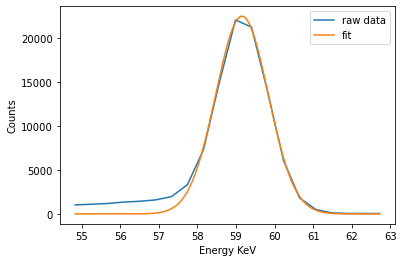

In [9]:
# downstairs calibration
measured_peak_area = {}

# am241
am241_spec = gsa.get_spect(am241_cal_ds_path)
# emitted photons
for i, peak in enumerate(cal_source_peaks["am241"]):
    intensity = 1
    emitted = am241_spec.real_time * cal_source_data["am241"] * intensity
    print(peak, emitted)

print(am241_spec.real_time)
# find peak area

# gsa.plot_spec(am241_spec, peaks=cal_source_peaks["am241"])

pos = gsa.find_energy_pos(am241_spec.ebins, cal_source_peaks["am241"])
print(pos)
x, y = gsa.get_peak_roi(pos, am241_spec)
popt = gsa.fit_peak(x, y)


# peak plot
plt.plot(x,y, label="raw data")

x = gsa.rebin(x, 10)

# plot fit
plt.plot(x, gsa.gaussian(x, popt[0], popt[1], popt[2]), label="fit")
plt.xlabel("Energy KeV")
plt.ylabel("Counts")
plt.legend()
plt.show()


In [5]:
# aluminum foil 21
counts, ebins = gsa.get_spect(al21_path)
gsa.plot_spec(counts)

[0 0 0 ... 0 0 0]


TypeError: cannot unpack non-iterable spect object

In [ ]:
# aluminum foil 22
counts, ebins = gsa.get_spect(al22_path)
gsa.plot_spec(counts)